# Chapter 02 2차원 벡터로 그림 그리기

## 2.1 2차원 벡터 그리기

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

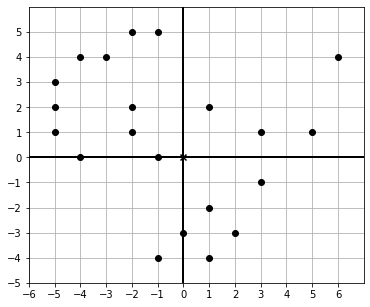

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2),(-2,2), (-5,1),
                    (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]
draw(Points(*dino_vectors))

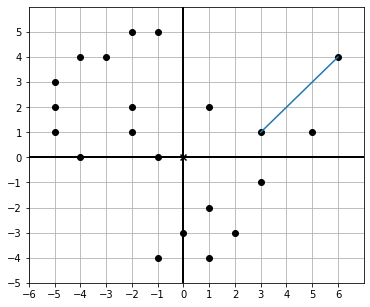

In [3]:
draw(Points(*dino_vectors),Segment((6,4),(3,1)))

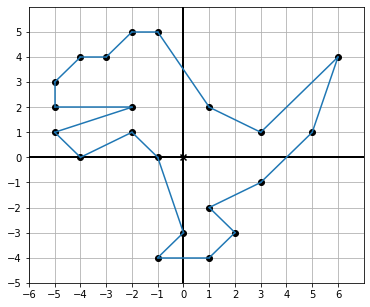

In [4]:
draw(Points(*dino_vectors),Polygon(*dino_vectors))

## 2.1.3 연습문제

### 연습문제 2.1
#### 공룡의 발끝에 해당하는 점의 x좌표와 y좌표를 구하라.

In [5]:
(-1,-4)

(-1, -4)

### 연습문제 2.2
#### 평면에 점 (2,-2)와 해당 점에 대응하는 화살표를 그려라.

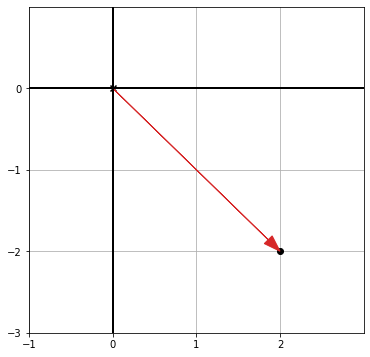

In [6]:
draw(Points((2,-2)),Arrow((2,-2)))

### 연습문제 2.3
#### 공룡의 외양을 나타내는 벡터를 나타내라

In [7]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2),(-2,2), (-5,1),
                    (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

### 연습문제 2.4
#### dino_vectors를 꼭짓점으로 해서 Polygon 객체를 생성하고 점들을 연결해서 공룡을 그려라.

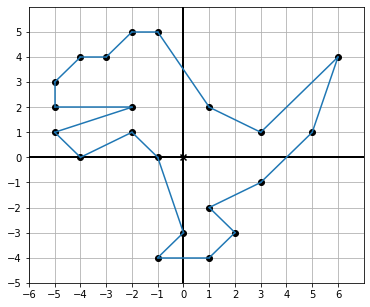

In [8]:
draw(Points(*dino_vectors),Polygon(*dino_vectors))

### 연습문제 2.5
#### draw 함수를 사용해 x=-10 이상 x=11 미만의 범위의 정수 x에 대해 벡터 (x,x**2)가 나타내는 점을 그려라.

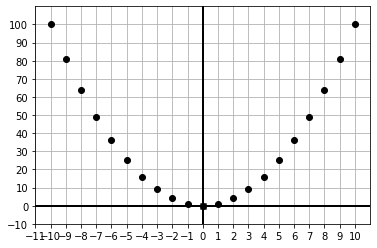

In [9]:
draw(
    Points(*[(x,x**2) for x in range (-10,11)]),
    grid = (1,10),
    nice_aspect_ratio = False)

## 2.2 평면벡터 산술

In [10]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [11]:
dino_vectors2 = [add((-1.5,-2.5),v) for v in dino_vectors]

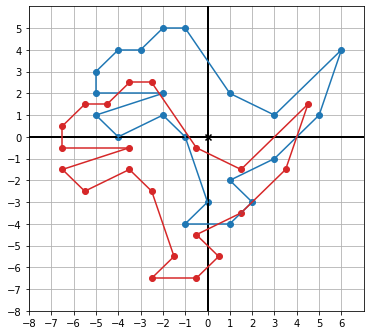

In [12]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

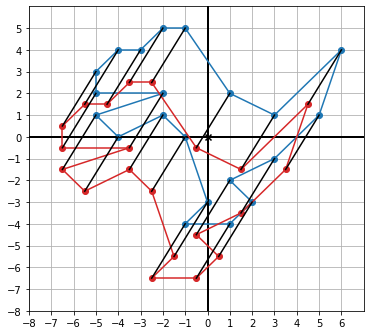

In [13]:
arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

### 2.2.1 벡터의 성분과 길이

In [14]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

###  2.2.3 뺄셈, 변위, 거리

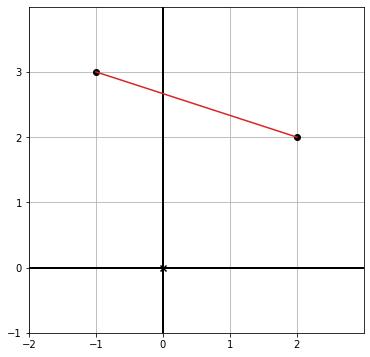

In [15]:
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

### 2.2.4 연습문제

### 연습문제 2.6
#### 세 벡터가 u = (-2,0), v = (1.5,1.5), w = (4,1)일 때, u+v, v+w, u+w, u+v+w의 결과를 구하라.

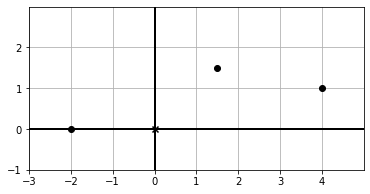

In [16]:
draw(
    Points((-2,0), (1.5,1.5), (4,1))
)

#### u+v = (-0.5,1.5)
#### v+w = (5.5,2.5)
#### u+w = (2,1)
#### u+v+w = (3.5,2.5)

### 연습문제 2.7 (MINI-PROJECT)
#### 여러 개의 벡터를 모두 더할 때, 각 벡터의 모든 x좌표와 각 벡터의 모든 y좌표를 더하면 된다. 예를 들어 4개의 벡터에 대한 벡터함 (1,2) + (2,4) + (3,6) + (4,8)의 x성분은 1 + 2 + 3 + 4 = 10이고, y성분은 2 + 4 + 6 + 9 = 20이므로 결과는 (10,20)이다. 임의 개수의 벡터가 인자로 주어질 수 있는 개선된 add 함수를 구현하라.

In [17]:
def add(*vectors):
    return (sum([v[0] for v in vectors]),sum([v[1] for v in vectors]))

### 연습문제 2.8
#### 평행이동을 나타내는 벡터 translation과 입력 벡터 리스트 vector를 입력으로 받고, translation에 의해 평행이동된 입력 벡터 리스트를 리런하는 함수 translate(translation, vectors)를 작성하라. 예를 들어 translate((1,1), [(0,0), (0,1), (-3,-3)])은 [(1,1), (1,2), (-2,-2)]를 리턴한다.

In [18]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

translate((1,1), [(0,0), (0,1), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

### 연습문제 2.9 (MINI-PROJECT)
#### 임의의 두 벡터 u, v에 대한 벡터합 u + v는 v + u와 같은 결과가 나온다. 좌표에 대한 벡터 합의 정의를 이용해 이 문장이 참인 이유를 설명하라. 또한, 기하학적으로 이 문장이 참인 이유를 설명하는 그림을 그려라.

#### 임의의 두 벡터 u와 v를 실수 a,b,c,d에 대하여 u = (a,b), v = (c,d)라고 표기할 수 있다. 이 때 벡터합은 u + v = (a+c, b+d)이다. 한편, v + u = (c+a, d+b)이다. 실수의 덧셈에서는 더하는 순서가 중요하지 않기 때문에 두 순서쌍은 같다고 할 수 있다. 시각적으로 두 벡터를 임의로 선택해 삼각형벅을 적용해보자. 순서대로 벡터를 더하면 동일한 합벡터가 된다는 것을 다시 한 번 확인할 수 있다.

### 연습문제 2.10
#### 다음 세 벡터 u, v, w 중에서 어떤 두 벡터를 선택해야 그 합이 가장 긴 화살표가 되는지 설명하라. 또한 어떤 두 벡터를 선택해야 그 합이 가장 짧은 화살표가 되는지 설명하라. 어떤 조합으로 더해야 가장 긴 화살표 또는 가장 짧은 화살표가 되는가?

#### 삼각형법을 사용하여 가장 긴 화살표는 v + w 이고, 가장 짧은 화살표는 v + u 이다.(u와 v가 거의 반대 되는 방향을 가리키고 있어 서로를 상쇄하기 때문이다.)

### 연습문제 2.11 (MINI-PROJECT)
#### 공룡을 겹치지 않도록 동시에 100개를 출력하고자 한다. 벡터합을 사용하는 파이썬 함수를 작성하라. 2,100개의 좌표 순서쌍을 하나하나 명시하는 게 얼마나 지루한 작업인지 상상해보면 컴퓨터 그래픽스의 강력함을 살펴볼 수 있다.

In [19]:
def hundred_dinos():
    translations = [(12*x, 10*y)
                  for x in range(0,10)
                  for y in range(0,10)]
    dinos = [Polygon(*translate(t, dino_vectors), color = blue)
             for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)

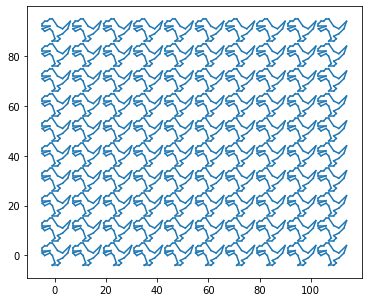

In [20]:
hundred_dinos()

### 연습문제 2.12
#### (3,-2) + (1,1) + (-2,-2)의 x성분과 y성분 중 어느 것이 더 긴지 비교하라.

#### x성분 = (2,0), y성분 = (0,-3)
#### x성분은 방향이 오른쪽이고 길이가 2단위인 벡터이고, y성분은 방향은 왼쪽이며 길이가 3단위인 벡터이므로 y성분이 더 길다.

### 연습문제 2.13
#### 두 벡터 (-6,-6)과 (5,-12)의 성분과 길이를 각각 구하라

#### (-6,-6)의 성분은 (-6,0)과 (0,-6)이며 길이는 모두 6이다. (-6,-6)의 길이는 6<sup>2</sup> + 6<sup>2</sup>의 제곱근은 8.485이고
#### (5,-12)의 성분은 (5,0)과 (0,-12)이며 길이는 각각 5와 12이다. (5,-12)의 길이는 5<sup>2</sup> + -12<sup>2</sup>의 제곱근은 13이다.

### 연습문제 2.14
#### 벡터 v의 길이가 6이고 x성분이 (1,0)이라 하자. v가 될 수 있는 좌표를 모두 나열하라.

#### 1<sup>2</sup> + b<sup>2</sup> = 36
#### b<sup>2</sup> = 35 이므로 y성분의 길이는 5.916이다. v가 될 수 있는 좌표는 (1,5.916), (1,-5.916)이다

### 연습문제 2.15
#### 리스트 dino_vectors에서 길이가 가장 긴 벡터를 구하라. 답을 빨리 계산할 수 있도록 앞에서 작성한 lengh 함수를 사용하라.

In [21]:
max(dino_vectors, key=length)

(6, 4)

### 연습문제 2.16
#### 벡터 w의 좌표가 ($\sqrt{2}$,$\sqrt{3}$)이라 하자. 이때 스칼라곱 $\pi$ $\cdot$ w의 좌표를 근사적으로 구하라. 원래 벡터와 새로운 벡터의 근사를 그림으로 그려라.

In [22]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))

In [23]:
w_scaled

(4.442882938158366, 5.441398092702653)

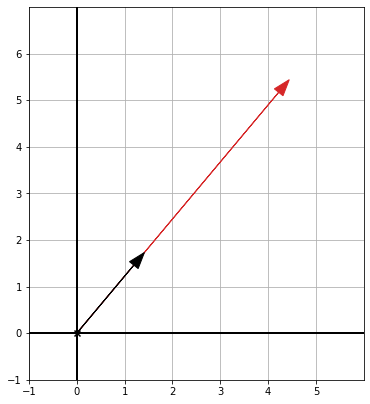

In [24]:
draw(
    Arrow(w_scaled, color=red),
    Arrow(w, color=black)
)

### 연습문제 2.17
#### 입력 벡터 v에 입력 스칼라 s를 곱하는 파이썬 함수 scale(s,v)를 작성하라.

In [25]:
def scale(s,v):
    return (s * v[0], s * v[1])

### 연습문제 2.18
#### 대수적으로 좌표에 배수를 곱하면 벡터의 길이도 같은 배수만큼 길어짐을 확인해보자. 길이가 c인 벡터의 좌표가 (a,b)라고 하자. 음수가 아닌 임의의 실수 s에 대해 (s $\cdot$ a,s $\cdot$ b)의 길이가 s $\cdot$ c이다. 

#### 벡터 (a,b)의 길이를 |(a,b)|로 나타내자. 문제에서 주어진 바에 따르면 다음이 성립된다.
#### <center> $c = \sqrt{a^2+b^2} = |(a,b)| $ </center>
#### 이를 통해 (s $\cdot$ a,s $\cdot$ b)의 길이를 계산할 수 있다.
#### <center> $|(sa,sb)| = \sqrt{(sa)^2+(sb)^2} = \sqrt{s^2a^2+s^2b^2}$ </center>
#### <center> $= \sqrt{s^2 \cdot (a^2+b^2)} = |s| \cdot \sqrt{a^2+b^2}$ </center>
#### <center> $ |s| \cdot c $ </center>
#### s가 음수가 아닌 한, s는 그 절댓값과 같다. 즉 s = |s|이다. 따라서 스칼라곱을 한 벡터의 길이는 우리가 보이고자 한 sc이다.

### 연습문제 2.19
#### u = (-1,1), v = (1,1)이고, r과 s가 실수라고 하자. 구체적으로 -3 < r < 3, -1 < s < 1 이라고 가정하자. 벡터 r $\cdot$ u + s $\cdot$ v가 될 수 있는 평면 상의 점들은 어디에 있는지 설명하라.

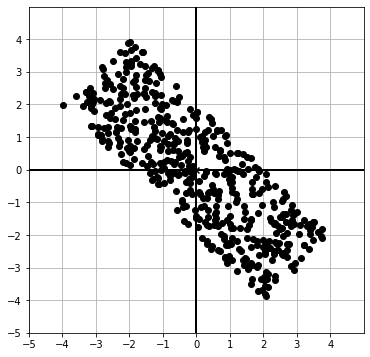

In [26]:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s():
    return uniform(-1,1)

possibilities = [add(scale(random_r(), u), scale(random_s(), v))
                for i in range(0,500)]
draw(
    Points(*possibilities)
)

### 연습문제 2.20
#### 대수적으로 벡터와 그 역벡터가 같은 길이를 가짐을 보여라.

#### (a,b)에 대한 역벡터의 좌표는 (-a,-b)이지만, 길이는 바뀌지 않는다.
#### <center> $\sqrt{(-a)^2 + (-b)^2}$ = $\sqrt{(-a) \cdot (-a) + (-b) \cdot (-b)}$ = $\sqrt{a^2 + b^2} $ </center>
#### 따라서 벡터 (-a, -b)는 (a,b) 길이가 같다.

### 연습문제 2.21
#### 화살표로 나타낸 다음 7개의 벡터 중에서 서로 역벡터로 짝을 이루는 것을 골라라.

####  벡터 v<sub>3</sub>와 v<sub>7</sub>이 서로의 역벡터로 짝을 이룬다.

### 연습문제 2.22
#### u가 임의의 2차원 벡터라고 하자. u + (-u)의 좌표를 구하라.

#### 2차원 벡터 u의 좌표가 (a,b)라고 하자. 벡터 u의 역벡터의 좌표는 (-a,-b)이다. 따라서 다음이 성립한다.
#### <center> u + (-u) = (a,b) + (-a,-b) = (a-a,b-b) = (0,0) </center>
#### 따라서 답은 (0,0)이다. 기하학적으로 벡터를 따라갔다가 역벡터를 따라가면 원점 (0,0)으로 돌아옴을 의미한다.

### 연습문제 2.23
#### 벡터 u = (-2,0), v = (1.5,1.5), w = (4,1)에 대해, v - w, u - v, w - v의 결과를 구하라.

####  v - w = (-2.5,0.5)
#### u - v = (-3.5,-1.5)
#### w - v = (2.5,-0.5)

### 연습문제 2.24
#### 두 개의 2차원 벡터를 입력으로 받고 2차원 벡터 v1 - v2의 결과를 출력으로 리턴하는 파이썬 함수 subtract(v1,v2)를 작성하라

In [27]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

### 연습문제 2.25
#### 두 입력 벳터 간의 거리를 리턴하는 파이썬 함수 distance(v1,v2)를 작성하라.
#### 벡터 리스트를 인자로 받아서 각 벡터에서 다음 벡터까지의 거리의 합(마지막 벡터에서 첫 벡터까지의 거리 포함)을 리턴하는 다른 파이썬 함수 (perimeter(vectors)를 작성하라.
#### dino_vectors가 정의한 공룡의 둘레를 구하라.

In [28]:
def distance(v1,v2):
    return length(subtract(v1,v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                for i in range(0,len(vectors))]
    return sum(distances)

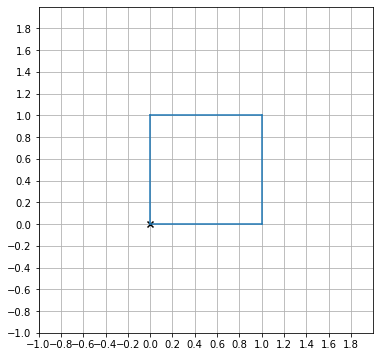

In [29]:
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [30]:
perimeter(square)

4.0

In [31]:
perimeter(dino_vectors)

44.77115093694563

### 연습문제 2.26
#### 벡터 (1,-1)을 u라고 하자, 자연수 n, m이 n > m을 만족할 때, u에서의 거리가 13이며 좌표가 (n,m)인 다른 벡터 v가 있다고 하자. u에서 v로의 변위를 구하라.

In [50]:
for n in range(-12,15):
    for m in range(-14,13):
        if distance((n,m), (1,-1)) == 13 and n > m > 0:
            print((n,m))

(13, 4)


## 2.3 평면의 각과 삼각법

### 2.3.2 파이썬에서 라디안과 삼각법

In [51]:
from math import tan
tan(45)

1.6197751905438615

In [52]:
from math import tan, pi
tan(pi/4)

0.9999999999999999

In [53]:
from math import sin, cos
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length * cos(angle), length * sin(angle))

In [54]:
from math import pi
angle = 37 * pi / 180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

### 2.3.3 성분에서 각 구하기

In [37]:
from math import asin
sin(1)

0.8414709848078965

In [38]:
asin(0.8414709848078965)

1.0

In [39]:
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [40]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [41]:
cos(2.1587989303424644)

-0.5547001962252293

In [42]:
-2/sqrt(13)

-0.5547001962252291

In [43]:
sin(2.1587989303424644)

0.8320502943378435

In [44]:
3/sqrt(13)

0.8320502943378437

In [45]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [46]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return(length(vector), angle)

In [47]:
to_polar((1,0))

(1.0, 0.0)

In [48]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

### 2.3.4 연습문제

### 연습문제 2.27
#### 데카르트 좌표 (-1.34, 2.68)로 주어진 벡터의 길이가 기대한 바대로 약 3이 되는지 확인하라.

In [49]:
length((-1.34, 2.68))

2.9963310898497184

### 연습문제 2.28
#### 다음 그림은 양의 x축 방향에서 시작해 반시계방향으로 22$^\circ $인 각이 만들어낸 선을 보여준다. 이그림을 바탕으로 tan(22$^\circ$) 의 근삿값을 구하라.

#### 그림과 같이 이 선은 점 (10,4)의 근처를 지나므로 4/10 = 0.4는 tan(22$^\circ) $의 좋은 근삿값이다.

###  연습문제 2.29
#### 벡터의 길이와 방향을 알 때 성분을 구하고 싶다고 하자. 길이가 15이고 37$^\circ$를 가리키는 벡터의 $x$성분과 $y$성분을 구하라.

#### 각 37$^\circ$의 사인값은 대략 3/5이다. 이 각을 따라 거리가 5단위 증가할 때마다 위쪽으로 3단위씩 증가한다는 뜻이다. 따라서 거리가 15단위라는 것은 수직 성분이 3/5 $\cdot$ 15 = 9임을 알 수 있다.
#### 각 37$^\circ$의 코사인값은 대략 4/5이다. 이 각을 따라 거리가 5단위 증가할 때마다 오른쪽으로 4단위씩 증가한다는 뜻이다. 따라서 수평 성분이 4/5 $\cdot$ 15 = 12임을 알 수 있다.
#### 요약하자면 극좌표 (15, 37^$\circ$)는 근사적으로 데카르트 좌표 (12, 9)에 대응한다

### 연습문제 2.30
#### 양의 $x$축 방향에서 시작해 반시계방향으로 측정된 각 125$^\circ$를 따라 8.5단위 나아간다고 하자. sin(125$^\circ$) = 0.819이고 cos(125$^\circ$) = -0.574일 때, 최종 좌표를 구하라. 해당 각과 이동한 경로를 그려라.

#### 최종 좌표의 각 성분은 다음과 같다.
#### <center> $ x = r \cdot cos(\theta) = 8.5 \cdot -0.574 = -4.879$ </center>
#### <center> $ y = r \cdot sin(\theta) = 8.5 \cdot 0.819 = 6.962$ </center>

### 연습문제 2.31
#### 0$^\circ$, 90$^\circ$, 180$^\circ$에서 사인값과 코사인 값을 구하라. 다시 말해 각 방향으로 이동할 때 이동단위 거리당 수직 성분과 수평 선분의 크기를 구하라

In [59]:
sin(0), cos(0)

(0.0, 1.0)

In [60]:
sin(90), cos(90)

(0.8939966636005579, -0.4480736161291701)

In [61]:
sin(180), cos(180)

(-0.8011526357338304, -0.5984600690578581)

###  연습문제 2.32
#### 오른쪽 그림은 직각삼각형을 정확하게 측정한 결과를 보여준다. 먼저 피타고라스 정리를 통해 각 변의 길이가 직각삼각형으로서 합당한지 확인하라. sin(30$^\circ$), cos(30$^\circ$), tan(30$^\circ$)의 값을 십진법으로 소수점 세 자리까지 계산하라.

####  각 변의 길이는 실제로 피타고라스의 정리를 만족한다. 피타고라스 정리에 각 변의 길이를 대입하면 다음과 같다.
#### <center> $\sqrt{(1/2)^2 + (\sqrt{3}/2)^2} = \sqrt{(1/4)+(3/4)} = \sqrt{4/4} = 1 $ </center>

####  <center> $sin(30^\circ) = 0.500 $ $ cos(30^\circ) = 0.866 $ $tan(30^\circ) = 0.577 $ </center>

###  연습문제 2.33
#### [연습문제 2.32]에서 등장한 삼각형을 회전이동이나 대칭이동하여 관찰하는 방식으로, sin(60$^\circ$), cos(60$^\circ$), tan(60$^\circ$)의 값을 십진법으로 소수점 세 자리까지 계산하라.

####  <center> $sin(60^\circ) = 0.866 $ $ cos(60^\circ) = 0.500 $ $tan(60^\circ) = 1.732 $ </center>

###  연습문제 2.34
#### 50$^\circ$에 대한 코사인 값이 0.643일 때, 그림을 그려 sin(50$^\circ$)와 tan(50$^\circ$)의 값을 구하라.

#### <center> $ \sqrt{0.643^2 + x^2} = 1 $ </center>
#### <center> $ 0.643^2 + x^2 = 1 $ </center>
#### <center> $ 0.413 + x^2 = 1 $ </center>
#### <center> $ x^2 = 0.587 $ </center>
#### <center> $ x = 0.766 $ </center>

#### <center> 따라서 sin(50$^\circ$) = 0.766/1 = 0.766, tan(50$^\circ$) = 0.766/0.643 =  1.192이다. </center>

### 연습문제 2.35
#### 각의 크기 116.57$^\circ$을 라디안으로 나타내라. 앞 절에서 했던 것과 마찬가지로 파이썬을 사용해 이 각에 대한 탄젠트값을 계산하고, -2에 근접함을 확인하라.

#### 116.57$^\circ$ $\cdot$ (1라디안/57.296$^\circ$) = 2.035라디안

In [64]:
tan(2.035)

-1.9972227673316139

### 연습문제 2.36
#### 크기가 10$\pi$/6인 각이 어디에 위치하는지 설명하라. cos(10$\pi$/6)과 sin(10$\pi$/6)의 값이 양수인지 음수인지 답하라. 파이썬을 사용해 실제 값을 구해서 답이 맞는지 확인하라.

In [65]:
sin(10*pi/6)

-0.8660254037844386

In [66]:
cos(10*pi/6)

0.5000000000000001